In [ ]:
# [설정] 데이터 로드 및 기본 확인
import pandas as pd

# CSV 파일 절대 경로
csv_path = '/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/data/raw/건설안전사고_재해자특성.csv'

# CSV 불러오기
df = pd.read_csv(csv_path, encoding='utf-8')

# 데이터 기본 확인
print("데이터 크기 (행, 열):", df.shape)
print("열 이름:", df.columns.tolist())
df.head()  # 상위 5행 출력

데이터 크기 (행, 열): (34034, 30)
열 이름: ['사고신고사유', '사고일시', '공정율', '날씨', '시도구분', '공사종류', '공사비', '공종(소분류)', '사망자', '내국인 사망자', '외국인 사망자', '남성 사망자', '여성 사망자', '10이상-20미만 사망자', '20이상-30미만 사망자', '30이상-40미만 사망자', '40이상-50미만 사망자', '50이상-60미만 사망자', '60이상 사망자', '부상자', '내국인 부상자', '외국인 부상자', '남성 부상자', '여성 부상자', '10이상-20미만 부상자', '20이상-30미만 부상자', '30이상-40미만 부상자', '40이상-50미만 부상자', '50이상-60미만 부상자', '60이상 부상자']


,사고신고사유,사고일시,공정율,날씨,시도구분,공사종류,공사비,공종(소분류),사망자,내국인 사망자,...,내국인 부상자,외국인 부상자,남성 부상자,여성 부상자,10이상-20미만 부상자,20이상-30미만 부상자,30이상-40미만 부상자,40이상-50미만 부상자,50이상-60미만 부상자,60이상 부상자
0,3일이상 휴업이 필요한 부상,2019-07-01 07:10:00,20~29%,맑음,경기도,건축/건축물/업무시설,10억 ~ 20억원 미만,기타,0,0,...,1,0,1,0,0,0,0,0,1,0
1,3일이상 휴업이 필요한 부상,2019-07-01 08:50:00,80~89%,강우,경기도,건축/건축물/공동주택,150억 ~ 200억원 미만,가설공사,0,0,...,0,1,1,0,0,0,1,0,0,0
2,3일이상 휴업이 필요한 부상,2019-07-01 09:30:00,60~69%,맑음,경기도,토목/옹벽 및 절토사면/옹벽,"1,000억원 이상",가설공사,0,0,...,1,0,1,0,0,0,0,0,1,0
3,3일이상 휴업이 필요한 부상,2019-07-01 10:00:00,90% 이상,맑음,인천광역시,토목/터널/철도터널,"500억 ~ 1,000억원 미만",가설공사,0,0,...,1,0,1,0,0,0,0,0,0,1
4,3일이상 휴업이 필요한 부상,2019-07-01 10:10:00,50~59%,맑음,경기도,건축/건축물/공동주택,"500억 ~ 1,000억원 미만",전기설비공사,0,0,...,1,0,1,0,0,0,0,0,1,0


In [ ]:
# [전처리] 데이터 정제 및 파생변수 생성 (결과 저장: data/processed)
# ============================================================
# 0. 라이브러리 불러오기
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import os

# Mac 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# ============================================================
# 1. CSV 불러오기 (원본)
# ============================================================
csv_path = '/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/data/raw/건설안전사고_재해자특성.csv'

# 구분자 자동 감지
with open(csv_path, 'r', encoding='utf-8') as f:
    first_line = f.readline()
    if '\t' in first_line:
        sep = '\t'
    elif ';' in first_line:
        sep = ';'
    else:
        sep = ','

df = pd.read_csv(csv_path, sep=sep, encoding='utf-8')

# ============================================================
# 2. 공통 전처리
# ============================================================

# 사고일시를 datetime으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], errors='coerce')

# 필요 없는 열 제거
drop_columns = ['시도구분', '공사비', '날씨', '60이상 사망자', '60이상 부상자']
for col in drop_columns:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# 결측치 확인
print("각 열 결측치 개수:")
print(df.isna().sum())

# 수치형 기본 통계 확인
print("\n사망자/부상자 기본 통계:")
print(df[['사망자','부상자']].describe())

# ============================================================
# 3. 전처리 완료 파일 저장
# ============================================================
processed_dir = '/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/data/processed'
os.makedirs(processed_dir, exist_ok=True)

processed_path = os.path.join(processed_dir, '건설안전사고_전처리.csv')
df.to_csv(processed_path, index=False, encoding='utf-8-sig')

print(f"\n전처리 완료 파일 저장 완료: {processed_path}")

각 열 결측치 개수:
사고신고사유           0
사고일시             0
공정율              0
공사종류             0
공종(소분류)          0
사망자              0
내국인 사망자          0
외국인 사망자          0
남성 사망자           0
여성 사망자           0
10이상-20미만 사망자    0
20이상-30미만 사망자    0
30이상-40미만 사망자    0
40이상-50미만 사망자    0
50이상-60미만 사망자    0
부상자              0
내국인 부상자          0
외국인 부상자          0
남성 부상자           0
여성 부상자           0
10이상-20미만 부상자    0
20이상-30미만 부상자    0
30이상-40미만 부상자    0
40이상-50미만 부상자    0
50이상-60미만 부상자    0
dtype: int64

사망자/부상자 기본 통계:
                사망자           부상자
count  34034.000000  34034.000000
mean       0.045161      0.969648
std        0.300910      0.277547
min        0.000000      0.000000
25%        0.000000      1.000000
50%        0.000000      1.000000
75%        0.000000      1.000000
max       38.000000     10.000000

전처리 완료 파일 저장 완료: /Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/data/processed/건설안전사고_전처리.csv


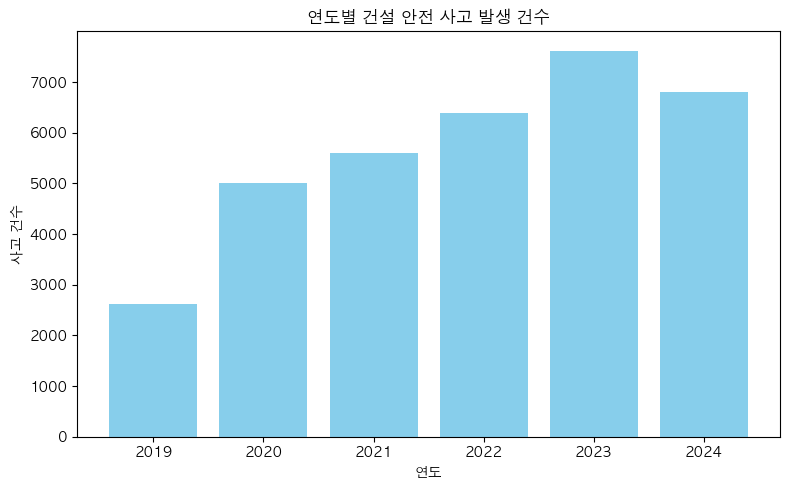

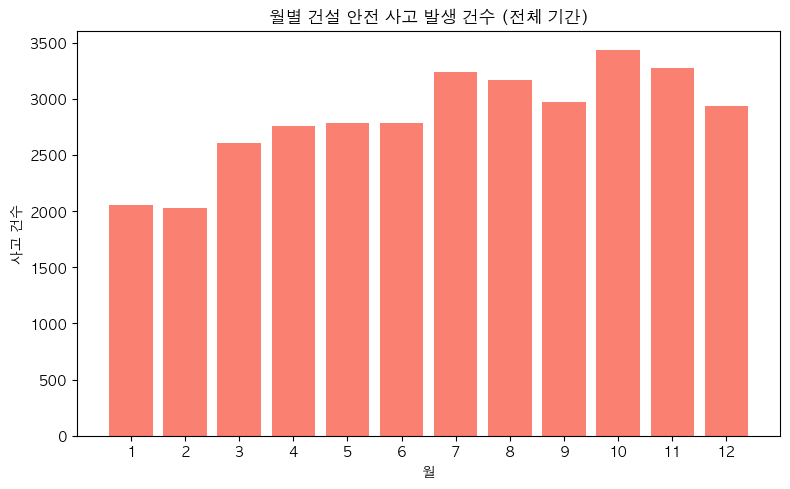

In [ ]:
# [분석 1] 사고 발생 추이 분석 (연도별/월별)
# ============================================================
# 0. 라이브러리 불러오기
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import os

# Mac 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# ============================================================
# 1. 전처리 CSV 불러오기
# ============================================================
processed_path = '/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/data/processed/건설안전사고_전처리.csv'
df = pd.read_csv(processed_path, encoding='utf-8-sig')

# ============================================================
# 2. 사고일시를 datetime으로 변환
# ============================================================
df['사고일시'] = pd.to_datetime(df['사고일시'], errors='coerce')

# ============================================================
# 3. 연도/월 컬럼 생성
# ============================================================
df['연도'] = df['사고일시'].dt.year
df['월'] = df['사고일시'].dt.month

# ============================================================
# 4. 연도별, 월별 사고 건수 집계
# ============================================================
year_count = df.groupby('연도').size().reset_index(name='사고건수')
month_count = df.groupby('월').size().reset_index(name='사고건수')

# ============================================================
# 5. 그래프 저장 폴더 생성 (질문별)
# ============================================================
question_num = '1_사고발생추이'
output_dir = f'/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/output/graphs/{question_num}'
os.makedirs(output_dir, exist_ok=True)

# ============================================================
# 6. 연도별 사고 건수 막대그래프
# ============================================================
plt.figure(figsize=(8,5))
plt.bar(year_count['연도'], year_count['사고건수'], color='skyblue')
plt.title('연도별 건설 안전 사고 발생 건수')
plt.xlabel('연도')
plt.ylabel('사고 건수')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '연도별_사고건수.png'))
plt.show()

# ============================================================
# 7. 월별 사고 건수 막대그래프
# ============================================================
plt.figure(figsize=(8,5))
plt.bar(month_count['월'], month_count['사고건수'], color='salmon')
plt.title('월별 건설 안전 사고 발생 건수 (전체 기간)')
plt.xlabel('월')
plt.ylabel('사고 건수')
plt.xticks(range(1,13))
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '월별_사고건수.png'))
plt.show()

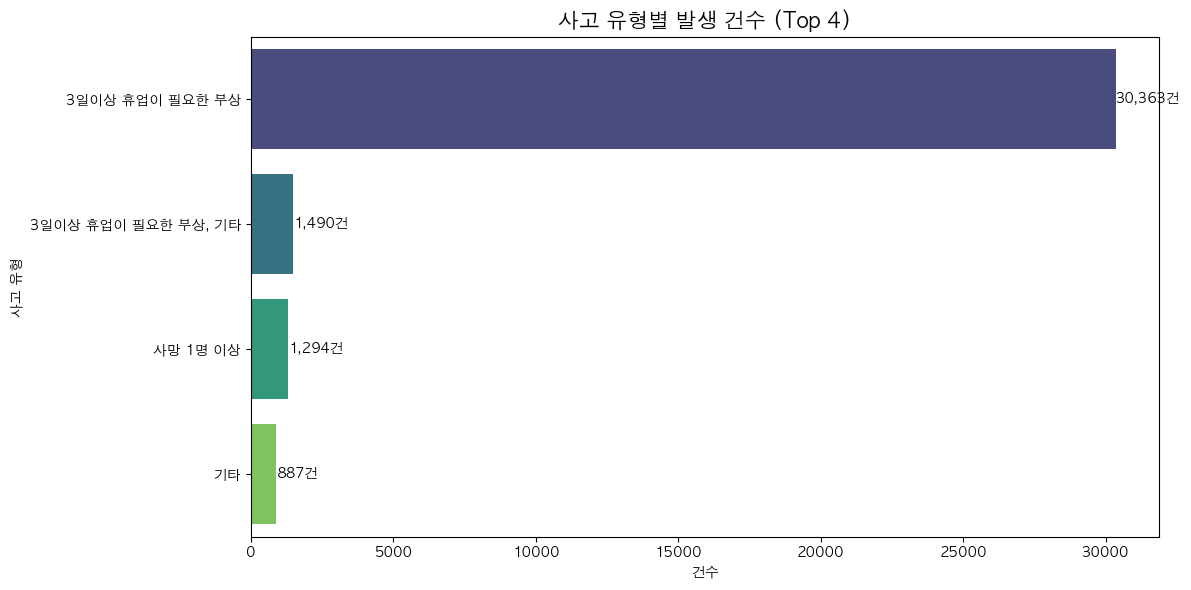

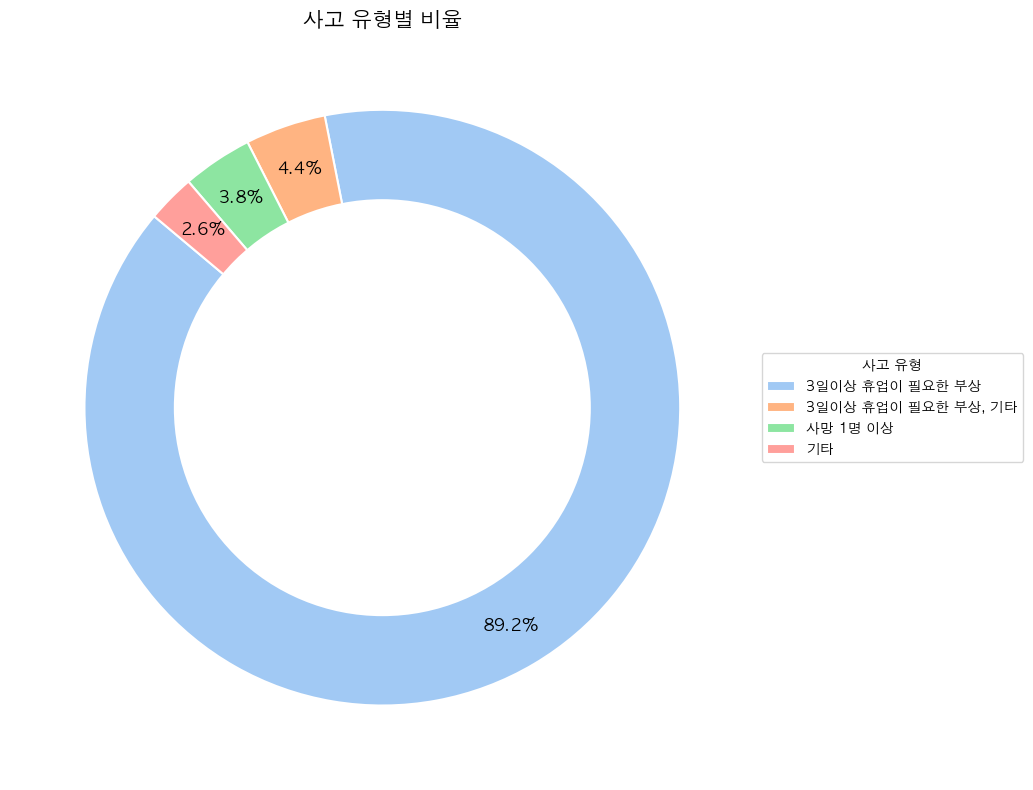

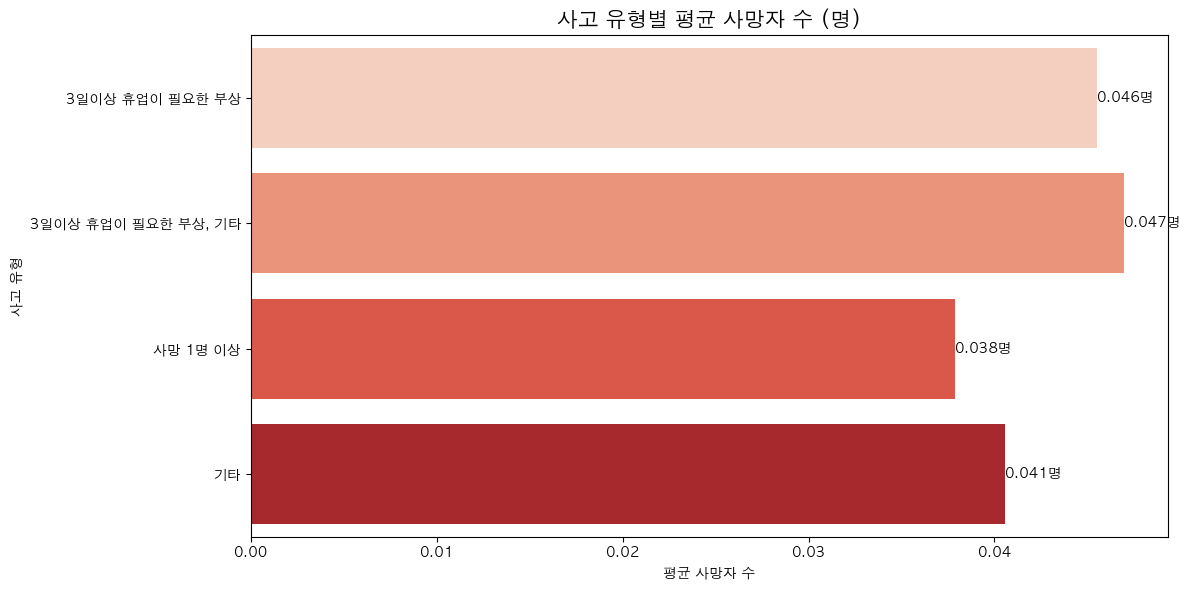

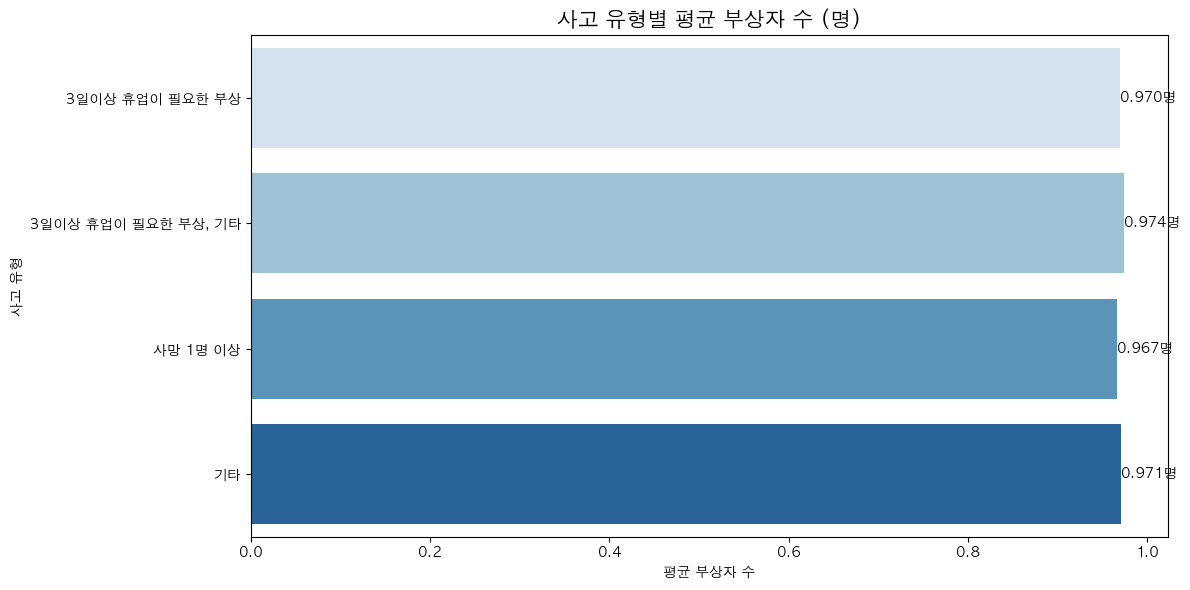

In [ ]:
# [분석 2] 사고 유형 분석 (Top N 및 기타)
# ============================================================
# 0. 라이브러리 불러오기
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import font_manager, rc
import platform

# 폰트 설정 (Mac/Windows)
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    # 폰트가 없을 경우를 대비해 사용 가능한 폰트 찾기
    font_list = [f.name for f in font_manager.fontManager.ttflist]
    if 'NanumGothic' in font_list:
        plt.rcParams['font.family'] = 'NanumGothic'
    else:
        plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# ============================================================
# 1. 전처리 CSV 불러오기
# ============================================================
processed_path = '/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/data/processed/건설안전사고_전처리.csv'
df = pd.read_csv(processed_path, encoding='utf-8-sig')

# ============================================================
# 2. 사고신고사유 전처리 (Top N + 기타)
# ============================================================
# 결측치 처리
df['사고신고사유'] = df['사고신고사유'].fillna('기타')

# 상위 4개 유형 추출 (기타 제외하고 순수 상위 4개만 추출하기 위해 value_counts 사용)
# 만약 원본 데이터에 이미 '기타'라는 항목이 있으면 그 건수도 포함될 수 있으므로 주의해야 함.
# 여기서는 가장 많이 발생한 4개를 뽑고 나머지를 '기타'로 묶음.
top_n = 4
top_causes = df['사고신고사유'].value_counts().nlargest(top_n).index.tolist()

# 로직 수정: 상위 4개 안에 '기타'가 들어가는 경우 중복 방지
# 만약 '기타'가 top 4 안에 포함되어 있다면, 이를 제외하고 추가로 하나 더 뽑거나 그대로 둠
if '기타' in top_causes:
    top_causes.remove('기타')

# 나머지는 '기타'로 통합
df['사고유형_그룹'] = df['사고신고사유'].apply(lambda x: x if x in top_causes else '기타')

# 집계 (건수)
type_count = df['사고유형_그룹'].value_counts()

# 순서 정렬: Top 4 -> 기타
# top_causes에 있는 것들을 먼저 배치하고, 마지막에 '기타'를 추가
order = [c for c in top_causes if c in type_count.index]
# '기타'는 무조건 마지막에 한 번만 추가
if '기타' in type_count.index and '기타' not in order:
    order.append('기타')
    
type_count = type_count[order]

# 집계 (평균 사망/부상)
type_mean = df.groupby('사고유형_그룹')[['사망자', '부상자']].mean().reindex(order)

# ============================================================
# 3. 그래프 저장 폴더 생성
# ============================================================
question_num = '2_사고유형'
output_dir = f'/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/output/graphs/{question_num}'
os.makedirs(output_dir, exist_ok=True)

# ============================================================
# 4. 시각화 (개선된 버전)
# ============================================================

# (1) 사고 유형별 건수 (가로 막대 그래프)
plt.figure(figsize=(12, 6))
# seaborn 막대 그래프 (FutureWarning 해결: hue 지정 및 legend=False)
sns.barplot(x=type_count.values, y=type_count.index, hue=type_count.index, palette='viridis', legend=False)
plt.title(f'사고 유형별 발생 건수 (Top {top_n})', fontsize=15)
plt.xlabel('건수')
plt.ylabel('사고 유형')
# 수치 라벨 추가
for i, v in enumerate(type_count.values):
    plt.text(v + 5, i, f'{int(v):,}건', va='center', fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '사고유형별_건수.png'))
plt.show()

# (2) 사고 유형별 비율 (파이 차트)
plt.figure(figsize=(12, 8)) # 범례를 위한 공간 확보
# labels=None: 차트 자체 라벨 제거, 범례로 대체하여 가독성 확보
# wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}: 테두리 선 추가
wedges, texts, autotexts = plt.pie(type_count, labels=None, autopct='%1.1f%%',
                                   startangle=140, colors=sns.color_palette('pastel'),
                                   pctdistance=0.85, textprops={'fontsize': 12},
                                   wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'})
plt.title('사고 유형별 비율', fontsize=15)

# 범례 추가
plt.legend(wedges, type_count.index, title="사고 유형", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 도넛 차트 형태로 변경
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '사고유형별_비율.png'))
plt.show()

# (3) 평균 사망자 수 (가로 막대)
plt.figure(figsize=(12, 6))
# FutureWarning 해결: hue 지정 및 legend=False
sns.barplot(x=type_mean['사망자'], y=type_mean.index, hue=type_mean.index, palette='Reds', legend=False)
plt.title('사고 유형별 평균 사망자 수 (명)', fontsize=15)
plt.xlabel('평균 사망자 수')
plt.ylabel('사고 유형') 
for i, v in enumerate(type_mean['사망자']):
    plt.text(v, i, f'{v:.3f}명', va='center', fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '사고유형별_평균사망자.png'))
plt.show()

# (4) 평균 부상자 수 (가로 막대)
plt.figure(figsize=(12, 6))
# FutureWarning 해결: hue 지정 및 legend=False
sns.barplot(x=type_mean['부상자'], y=type_mean.index, hue=type_mean.index, palette='Blues', legend=False)
plt.title('사고 유형별 평균 부상자 수 (명)', fontsize=15)
plt.xlabel('평균 부상자 수')
plt.ylabel('사고 유형')
for i, v in enumerate(type_mean['부상자']):
    plt.text(v, i, f'{v:.3f}명', va='center', fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '사고유형별_평균부상자.png'))
plt.show()

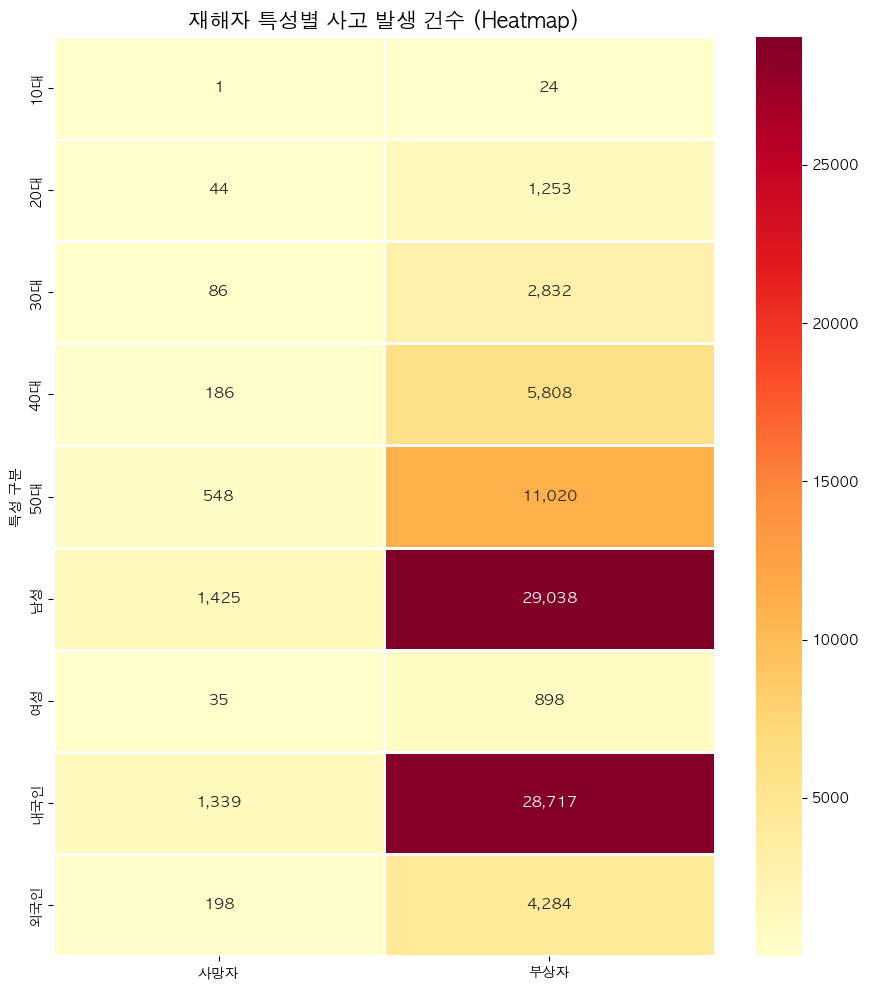

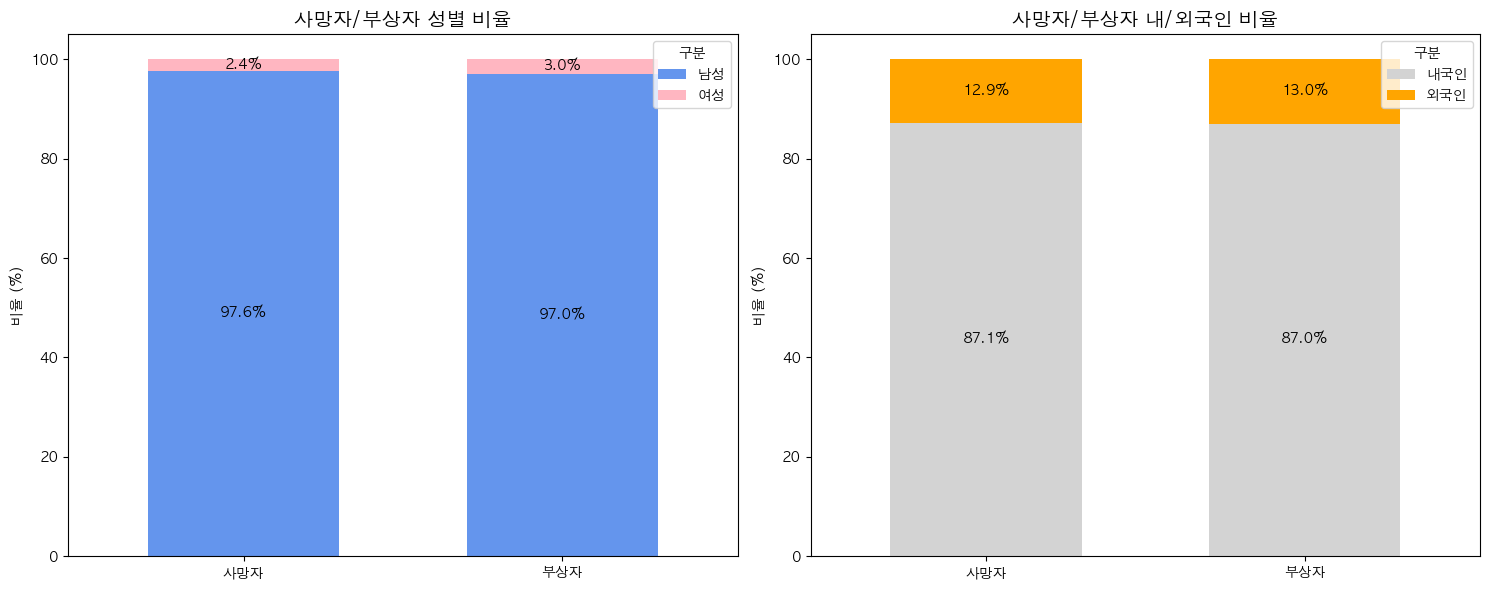

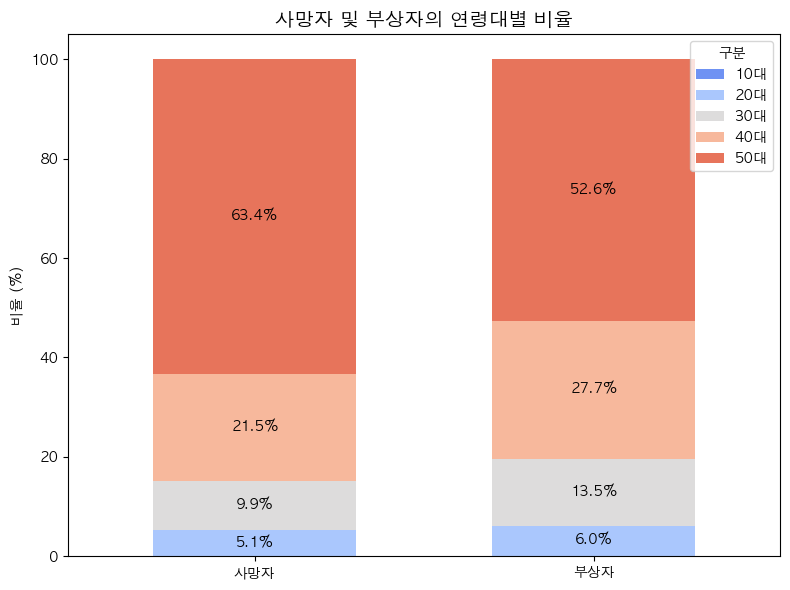

In [12]:
# [분석 3] 재해자 특성 분석 (히트맵 & 특성별 비율)
# ============================================================
# 0. 라이브러리 및 데이터 로드
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Mac 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
processed_path = '/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/data/processed/건설안전사고_전처리.csv'
df = pd.read_csv(processed_path, encoding='utf-8-sig')

# ============================================================
# 3. 시각화: 재해자 특성 심층 분석 (Heatmap & Stacked Bar)
# ============================================================
question_num = '3_재해자특성'
output_dir = f'/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/output/graphs/{question_num}'
os.makedirs(output_dir, exist_ok=True)

# ------------------------------------------------------------
# 1. 데이터 집계 (Heatmap용)
# ------------------------------------------------------------
# (1) 컬럼 정의 (데이터에 존재하는 컬럼만 동적으로 찾기 매핑)
# 연령대
age_groups = {
    '10대': ('10이상-20미만 사망자', '10이상-20미만 부상자'), 
    '20대': ('20이상-30미만 사망자', '20이상-30미만 부상자'),
    '30대': ('30이상-40미만 사망자', '30이상-40미만 부상자'),
    '40대': ('40이상-50미만 사망자', '40이상-50미만 부상자'),
    '50대': ('50이상-60미만 사망자', '50이상-60미만 부상자')
}
# 성별
gender_groups = {
    '남성': ('남성 사망자', '남성 부상자'),
    '여성': ('여성 사망자', '여성 부상자')
}
# 국적
nation_groups = {
    '내국인': ('내국인 사망자', '내국인 부상자'),
    '외국인': ('외국인 사망자', '외국인 부상자')
}

# (2) 부상자 컬럼명 예외 처리
real_cols = df.columns.tolist()
def find_col(keyword):
    if keyword in real_cols: return keyword
    for c in real_cols:
        if keyword.replace(' ', '') == c.replace(' ', ''): return c
    return None

# 집계 로직
heatmap_data = []
heatmap_index = []
target_groups = [age_groups, gender_groups, nation_groups]

for group_dict in target_groups:
    for label, (d_key, i_key) in group_dict.items():
        real_d, real_i = find_col(d_key), find_col(i_key)
        if real_d and real_i:
            d_val, i_val = df[real_d].sum(), df[real_i].sum()
            heatmap_data.append([d_val, i_val])
            heatmap_index.append(label)

heatmap_df = pd.DataFrame(heatmap_data, index=heatmap_index, columns=['사망자', '부상자'])

# ------------------------------------------------------------
# 2. 히트맵 시각화 [이미지 1]
# ------------------------------------------------------------
plt.figure(figsize=(9, 10))
sns.heatmap(heatmap_df, annot=True, fmt=',.0f', cmap='YlOrRd', linewidths=1, annot_kws={"size": 11})
plt.title('재해자 특성별 사고 발생 건수 (Heatmap)', fontsize=15)
plt.ylabel('특성 구분')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '재해자특성_히트맵.png'))
plt.show()

# ------------------------------------------------------------
# 3. 항목별 비율 Stacked Bar Chart (함수 정의)
# ------------------------------------------------------------
def get_plot_data(group_dict):
    data = {'사망자': [], '부상자': []}
    labels = []
    for label, (d_key, i_key) in group_dict.items():
        real_d, real_i = find_col(d_key), find_col(i_key)
        if real_d and real_i:
            data['사망자'].append(df[real_d].sum())
            data['부상자'].append(df[real_i].sum())
            labels.append(label)
    if not labels: return None
    
    plot_df = pd.DataFrame(data, index=labels).T 
    plot_df_pct = plot_df.div(plot_df.sum(axis=1), axis=0) * 100
    return plot_df_pct

def draw_stacked_bar(ax, df_pct, title, colors=None):
    df_pct.plot(kind='bar', stacked=True, color=colors, width=0.6, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('비율 (%)')
    ax.set_xticklabels(df_pct.index, rotation=0)
    ax.legend(title='구분', loc='upper right')
    
    for c in ax.containers:
        labels = [f'{v.get_height():.1f}%' if v.get_height() > 2 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', color='black', fontsize=10)

# ------------------------------------------------------------
# 4. 성별/국적 비율 시각화 [이미지 2]
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

df_gender = get_plot_data(gender_groups)
if df_gender is not None:
    draw_stacked_bar(axes[0], df_gender, '사망자/부상자 성별 비율', colors=['#6495ED', '#FFB6C1'])

df_nation = get_plot_data(nation_groups)
if df_nation is not None:
    draw_stacked_bar(axes[1], df_nation, '사망자/부상자 내/외국인 비율', colors=['#D3D3D3', '#FFA500'])

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '성별_국적_비율.png'))
plt.show()

# ------------------------------------------------------------
# 5. 연령대 비율 시각화 [이미지 3]
# ------------------------------------------------------------
df_age = get_plot_data(age_groups)
if df_age is not None:
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    draw_stacked_bar(ax, df_age, '사망자 및 부상자의 연령대별 비율', colors=sns.color_palette('coolwarm', 5))
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, '연령_비율.png'))
    plt.show()

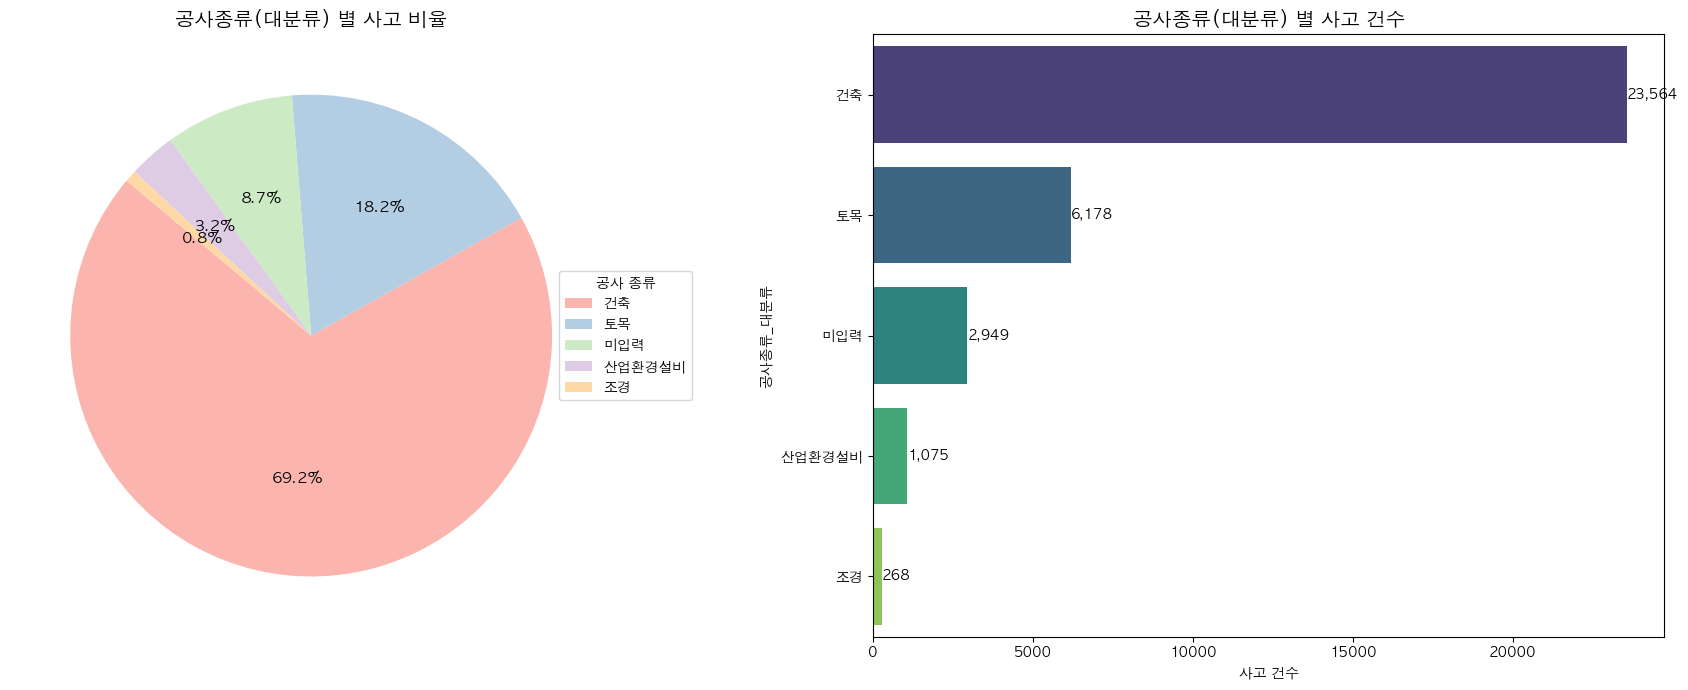

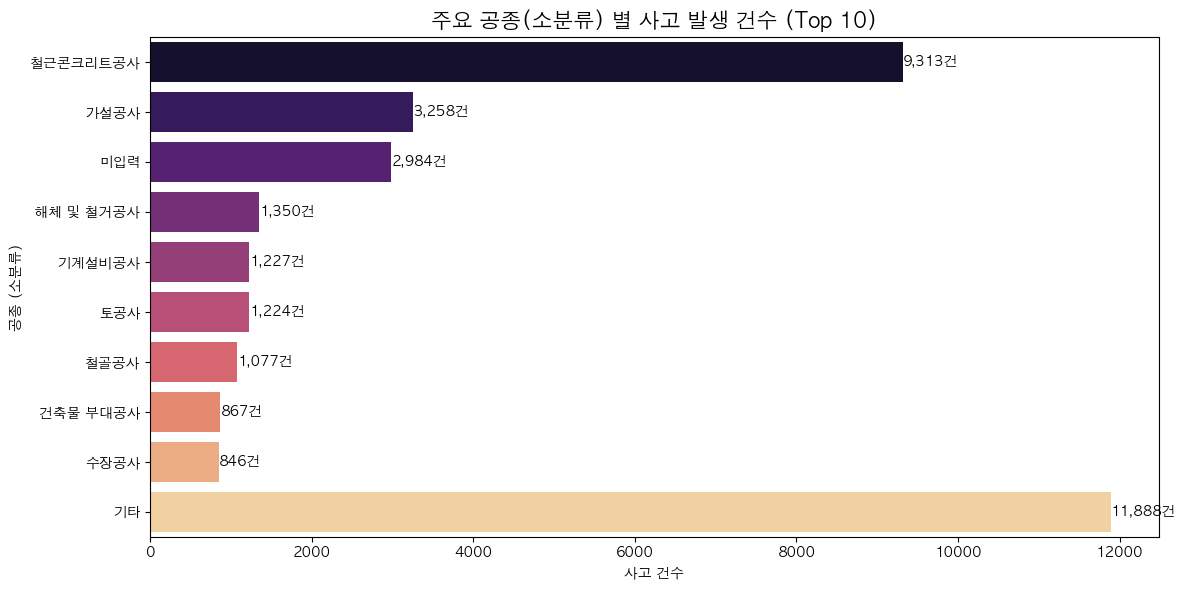

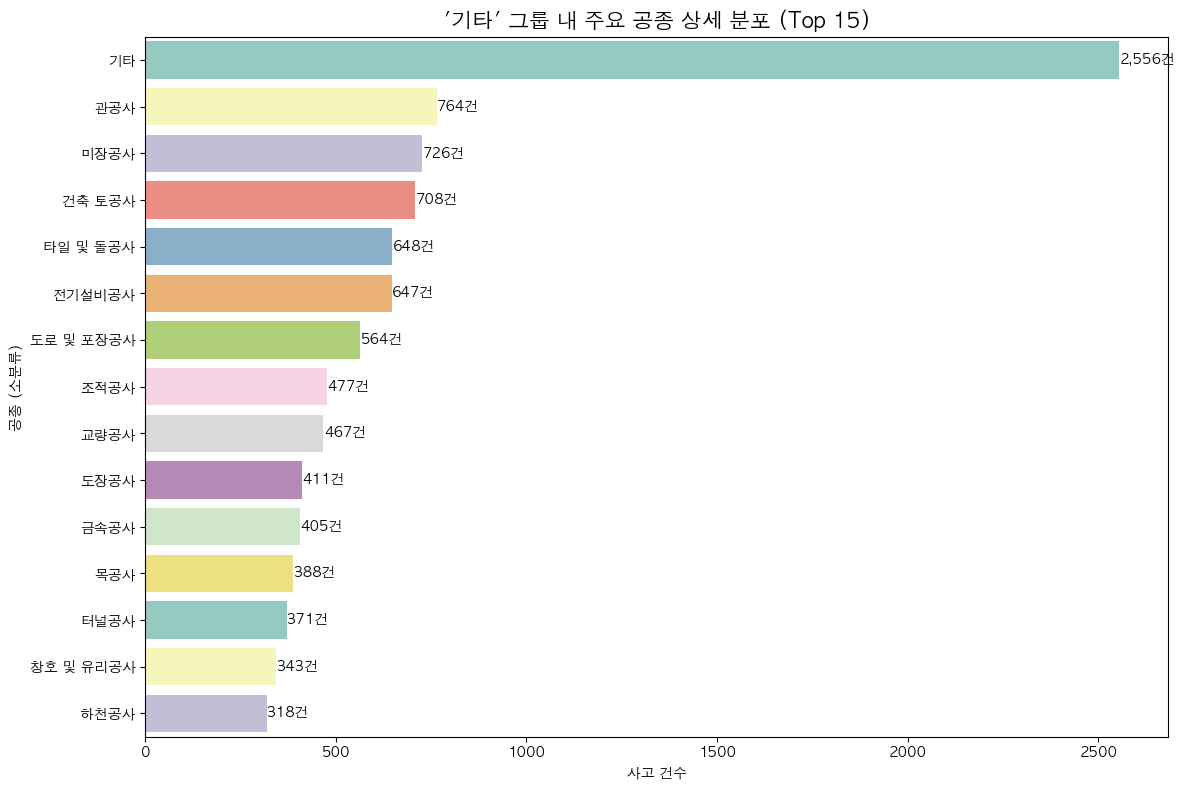

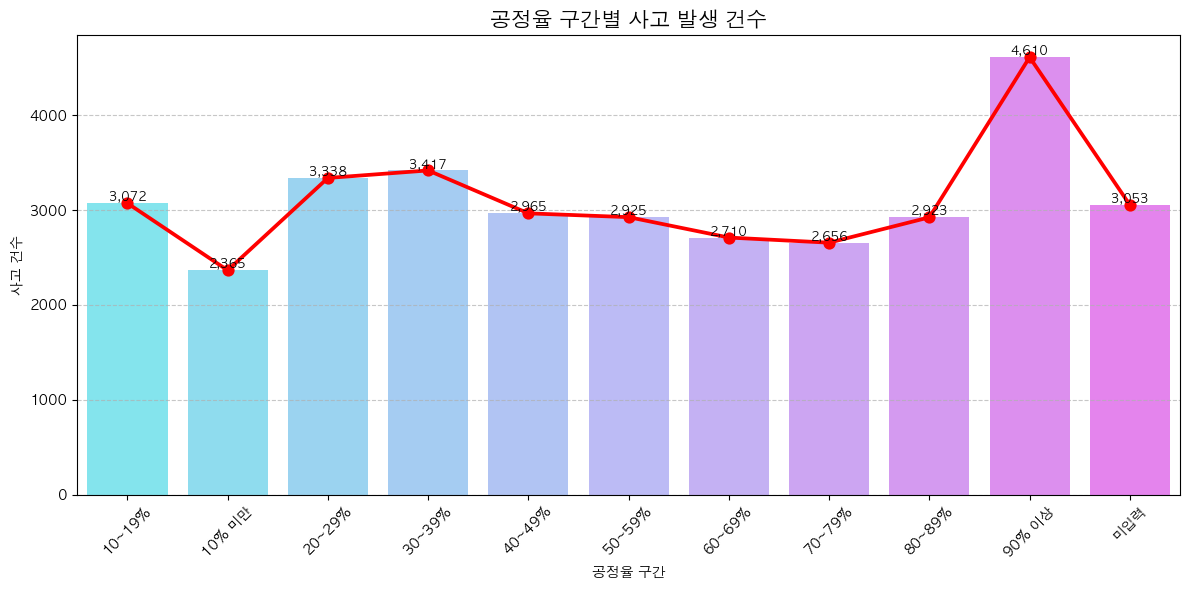

In [8]:
# [분석 4] 공사 관련 요인 분석 (종류, 공종, 공정율)
# ============================================================
# 0. 라이브러리 및 폰트 설정
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import platform
from matplotlib import font_manager, rc

# 폰트 설정
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

# ============================================================
# 1. 전처리 데이터 불러오기
# ============================================================
processed_path = '/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/data/processed/건설안전사고_전처리.csv'
df = pd.read_csv(processed_path, encoding='utf-8-sig')

# ============================================================
# 2. 데이터 전처리 (공사종류, 공종, 공정율)
# ============================================================
# (1) 공사종류: 대분류만 추출 (예: '건축/건축물/...' -> '건축')
df['공사종류_대분류'] = df['공사종류'].dropna().apply(lambda x: x.split('/')[0] if isinstance(x, str) else '기타')

# (2) 공종(소분류): 상위 n개만 추출하고 나머지는 '기타'
top_n_sub = 10
sub_counts = df['공종(소분류)'].value_counts()
top_subs = sub_counts.nlargest(top_n_sub).index.tolist()
if '기타' in top_subs: top_subs.remove('기타') # 기타가 상위에 있으면 일단 제거 후 후순위 배치

df['공종_그룹'] = df['공종(소분류)'].apply(lambda x: x if x in top_subs else '기타')

# '기타' 카테고리 상세 내역 계산 (출력 제거, 그래프용 데이터 준비)
others_breakdown = df[df['공종_그룹'] == '기타']['공종(소분류)'].value_counts()

# 순서 정렬 (Top N -> 기타)
order_sub = [c for c in top_subs if c in df['공종_그룹'].unique()]
if '기타' in df['공종_그룹'].unique(): order_sub.append('기타')

# (3) 공정율: 구간별 정렬을 위한 순서 매핑
# 데이터 상 공정율 값 예시: '10~19%', '90% 이상', '10% 미만', '미입력' 등
# 유니크 값 확인 후 정렬 순서 정의 (일반적인 텍스트 정렬로는 순서가 꼬일 수 있음)

# 정렬 키 생성 함수 (안전하게 수정됨)
def sort_process_rate_safe(val):
    if not isinstance(val, str): return 999  # 문자열이 아닌 경우 맨 뒤로
    if val == '미입력': return 998        # '미입력'은 맨 뒤 (기타 등보다 앞? 뒤? -> 여기선 맨 뒤)
    
    # 숫자 추출 시도
    clean_val = val.split('~')[0].replace('%', '').replace(' 미만', '').replace(' 이상', '').strip()
    
    if clean_val.isdigit():
        return int(clean_val)
    else:
        return 999 # 숫자로 변환 불가한 다른 케이스

process_order = sorted(df['공정율'].dropna().unique(), key=sort_process_rate_safe)

# ============================================================
# 3. 데이터 집계
# ============================================================
type_main_counts = df['공사종류_대분류'].value_counts()
sub_type_counts = df['공종_그룹'].value_counts()[order_sub]
process_counts = df['공정율'].value_counts().reindex(process_order)

# ============================================================
# 4. 그래프 저장 폴더 생성
# ============================================================
question_num = '4_공사관련요인'
output_dir = f'/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/output/graphs/{question_num}'
os.makedirs(output_dir, exist_ok=True)

# ============================================================
# 5. 시각화
# ============================================================

# (1) 공사종류(대분류) 별 사고 건수 (파이 차트 & 막대)
# 범례 공간 확보를 위해 figsize 확대
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# 파이 차트
# labels=None: 텍스트 겹침 방지를 위해 차트 안에는 라벨을 표시하지 않음
wedges, texts, autotexts = ax[0].pie(type_main_counts, labels=None, autopct='%1.1f%%', 
          startangle=140, colors=sns.color_palette('Pastel1'), textprops={'fontsize': 11})
ax[0].set_title('공사종류(대분류) 별 사고 비율', fontsize=14)

# 범례(Legend) 추가 - 그래프 식별성 강화
ax[0].legend(wedges, type_main_counts.index, title="공사 종류", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

# 막대 그래프
sns.barplot(x=type_main_counts.values, y=type_main_counts.index, hue=type_main_counts.index, palette='viridis', ax=ax[1], legend=False)
ax[1].set_title('공사종류(대분류) 별 사고 건수', fontsize=14)
ax[1].set_xlabel('사고 건수')
for i, v in enumerate(type_main_counts.values):
    ax[1].text(v + 10, i, f'{v:,}', va='center')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '공사종류별_사고건수.png'))
plt.show()

# (2) 공종(소분류) 별 사고 건수 (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x=sub_type_counts.values, y=sub_type_counts.index, hue=sub_type_counts.index, palette='magma', legend=False)
plt.title(f'주요 공종(소분류) 별 사고 발생 건수 (Top {top_n_sub})', fontsize=15)
plt.xlabel('사고 건수')
plt.ylabel('공종 (소분류)')
for i, v in enumerate(sub_type_counts.values):
    plt.text(v + 5, i, f'{v:,}건', va='center', fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, '공종별_Top10_사고건수.png'))
plt.show()

# (2-1) [추가] '기타' 그룹 상세 분포 시각화 (Top 15 items in Others)
# 사용자의 요청에 따라 '기타' 항목을 별도 그래프로 시각화
if not others_breakdown.empty:
    top_others_n = 15
    top_others = others_breakdown.head(top_others_n)

    plt.figure(figsize=(12, 8))
    # 막대 그래프 (기타 항목은 다른 색상 팔레트 사용)
    sns.barplot(x=top_others.values, y=top_others.index, hue=top_others.index, palette='Set3', legend=False)
    plt.title(f"'기타' 그룹 내 주요 공종 상세 분포 (Top {top_others_n})", fontsize=15)
    plt.xlabel('사고 건수')
    plt.ylabel('공종 (소분류)')
    
    # 수치 라벨
    for i, v in enumerate(top_others.values):
        plt.text(v + 1, i, f'{v:,}건', va='center', fontsize=10)
        
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, '공종_기타그룹_상세분포.png'))
    plt.show()

# (3) 공정율별 사고 발생 분포 (라인 + 영역)
plt.figure(figsize=(12, 6))
# 막대 그래프 (기본)
sns.barplot(x=process_counts.index, y=process_counts.values, hue=process_counts.index, palette='cool', alpha=0.6, legend=False)
# 추세선 (Pointplot)
sns.pointplot(x=process_counts.index, y=process_counts.values, color='red', markers='o', linestyles='-')

plt.title('공정율 구간별 사고 발생 건수', fontsize=15)
plt.xlabel('공정율 구간')
plt.ylabel('사고 건수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 수치 라벨
for i, v in enumerate(process_counts.values):
    plt.text(i, v + 20, f'{v:,}', ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '공정율별_사고분포.png'))
plt.show()

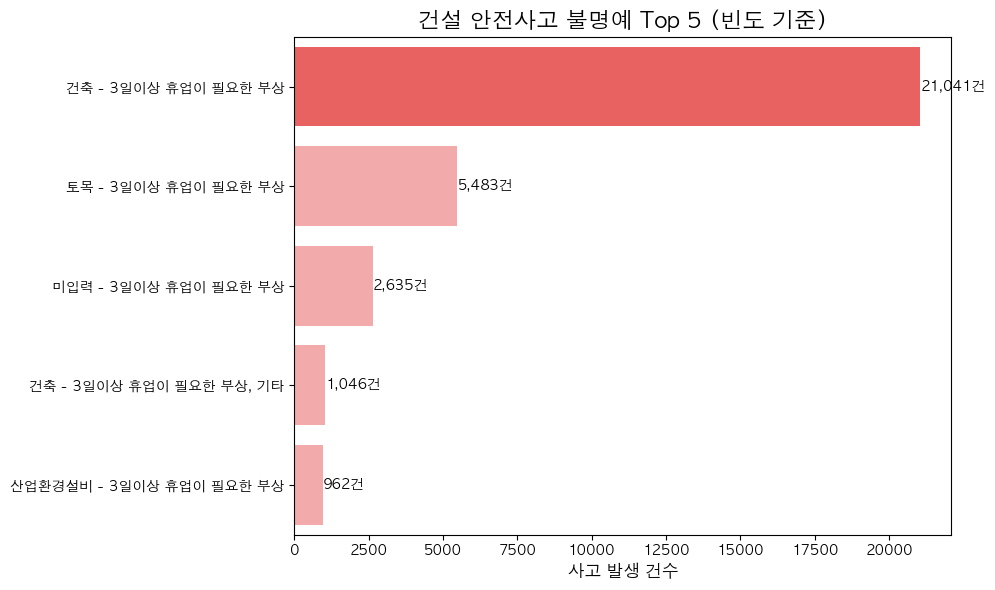

In [ ]:
# [분석 5] 종합 위험 분석 (위험 패턴 Top 5)
# ============================================================
# 5. 종합 위험 분석 (Top 5 Risk Patterns)
# ============================================================
question_num = '5_종합위험분석'
output_dir = f'/Users/hanjaedong/Desktop/Construction_Safety_Accident_Analysis/output/graphs/{question_num}'
os.makedirs(output_dir, exist_ok=True)

# (1) 데이터 집계: 공사종류(대분류) + 사고유형 결합
risk_pattern = df.groupby(['공사종류_대분류', '사고신고사유']).size().reset_index(name='사고건수')

# 읽기 쉬운 패턴명 생성
risk_pattern['패턴명'] = risk_pattern['공사종류_대분류'] + ' - ' + risk_pattern['사고신고사유']

# (2) Top 5 추출
risk_top5 = risk_pattern.sort_values(by='사고건수', ascending=False).head(5)

# (3) 시각화
plt.figure(figsize=(10, 6))

colors = ['#FF4B4B'] + ['#FF9E9E'] * 4 

sns.barplot(x='사고건수', y='패턴명', hue='패턴명', data=risk_top5, palette=colors, legend=False)

plt.title('건설 안전사고 불명예 Top 5 (빈도 기준)', fontsize=16, fontweight='bold')
plt.xlabel('사고 발생 건수', fontsize=12)
plt.ylabel('') 

for i, v in enumerate(risk_top5['사고건수']):
    plt.text(v + 10, i, f'{v:,}건', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Top5_위험패턴.png'))
plt.show()